---
# Shen Qinchen
Python Intermediate Programming Assignment 2
---

# Import Required Packages

In [91]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Enable Chinese to be displayed correctly

In [92]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Retrieving Data
Obtain the required “Statistics on Passenger Traffic for Festive Periods” data from “https://data.gov.hk/”.

In [93]:
df = pd.read_csv('https://www.immd.gov.hk/opendata/hkt/transport/immigration_clearance/statistics_passenger_traffic_festival_periods.csv', encoding='utf-8')

## Basic situation of the data

In [94]:
df.head()

,日期,假期,管制站,入境 / 出境,香港居民,內地訪客,其他訪客,總計
0,4/4/2019,四,機場,入境,29331,15048,32239,76618
1,4/4/2019,四,機場,出境,48963,11905,21276,82144
2,4/4/2019,四,高鐵西九龍,入境,7063,17165,1557,25785
3,4/4/2019,四,高鐵西九龍,出境,20618,9134,873,30625
4,4/4/2019,四,紅磡,入境,1871,1123,402,3396


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12046 entries, 0 to 12045
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   日期       12046 non-null  object
 1   假期       12046 non-null  object
 2   管制站      12046 non-null  object
 3   入境 / 出境  12046 non-null  object
 4   香港居民     12046 non-null  int64 
 5   內地訪客     12046 non-null  int64 
 6   其他訪客     12046 non-null  int64 
 7   總計       12046 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 753.0+ KB


In [96]:
df.describe()

,香港居民,內地訪客,其他訪客,總計
count,12046.000000,12046.000000,12046.000000,12046.000000
mean,2925.713266,1128.384692,333.827827,4387.925784
std,11761.194916,5048.791708,1965.629902,16859.974577
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,293.750000,6.000000,5.000000,348.000000
max,184063.000000,80712.000000,34586.000000,208027.000000


## Analysis of data

### Replace the code with the English name of the vacation
In this data, the names of the holidays are replaced by Chinese numerals, details of which can be found in 'https://www.immd.gov.hk/opendata/hks/transport/immigration_clearance/data_specification_for_statistics_passenger_traffic_festival_periods.pdf'

In [97]:
df['假期'].dtype

dtype('O')

In [98]:
df['假期'].unique()

array(['四', '三', '五', '六', '七', '八', '九', '十+十一', '十二+一', '二', '五+六',
       '九+十', '十一', '十二'], dtype=object)

In [99]:
holiday_mapping = {
    "一": "NewYear",
    "二": "ChineseNewYear",
    "三": "Easter",
    "四": "Qingming",
    "五": "LabourDay",
    "六": "BirthdayoftheBuddha",
    "七": "Dragonboatfestival",
    "八": "HKSAREstablishmentDay",
    "九": "MidAutumn",
    "十一":"DoubleNinth",
    "十二":"Christmas",
    "十+十一": "NationalDayAndDoubleNinth",
    "十二+一": "ChristmasAndNewYear",
    "五+六": "LabourDayAndBirthdayoftheBuddha",
    "九+十":"MidAutumnAndNationalDay",
}

df['假期'] = df['假期'].map(holiday_mapping)

In [100]:
df['假期'].unique()

array(['Qingming', 'Easter', 'LabourDay', 'BirthdayoftheBuddha',
       'Dragonboatfestival', 'HKSAREstablishmentDay', 'MidAutumn',
       'NationalDayAndDoubleNinth', 'ChristmasAndNewYear',
       'ChineseNewYear', 'LabourDayAndBirthdayoftheBuddha',
       'MidAutumnAndNationalDay', 'DoubleNinth', 'Christmas'],
      dtype=object)

### Search for specific data

Get data for April 4, 2019

In [81]:
april_4_2019 = df[(df['日期'] == '4/4/2019')]
april_4_2019

,日期,假期,管制站,入境 / 出境,香港居民,內地訪客,其他訪客,總計
0,4/4/2019,Qingming,機場,入境,29331,15048,32239,76618
1,4/4/2019,Qingming,機場,出境,48963,11905,21276,82144
2,4/4/2019,Qingming,高鐵西九龍,入境,7063,17165,1557,25785
3,4/4/2019,Qingming,高鐵西九龍,出境,20618,9134,873,30625
4,4/4/2019,Qingming,紅磡,入境,1871,1123,402,3396
5,4/4/2019,Qingming,紅磡,出境,4581,920,318,5819
6,4/4/2019,Qingming,羅湖,入境,75438,22606,1957,100001
7,4/4/2019,Qingming,羅湖,出境,158537,24415,1933,184885
8,4/4/2019,Qingming,落馬洲支線,入境,45863,21225,894,67982
9,4/4/2019,Qingming,落馬洲支線,出境,64735,19131,655,84521


Get 3 specific columns.

In [82]:
selected_columns = df[['管制站', '入境 / 出境', '總計']]
selected_columns

,管制站,入境 / 出境,總計
0,機場,入境,76618
1,機場,出境,82144
2,高鐵西九龍,入境,25785
3,高鐵西九龍,出境,30625
4,紅磡,入境,3396
...,...,...,...
12041,啟德郵輪碼頭,出境,0
12042,港澳客輪碼頭,入境,0
12043,港澳客輪碼頭,出境,0
12044,屯門客運碼頭,入境,0


Obtain data on airport entry and exit.

In [114]:
airport_df = df[df['管制站'] == '機場']
airport_df

,日期,假期,管制站,入境 / 出境,香港居民,內地訪客,其他訪客,總計
0,4/4/2019,Qingming,機場,入境,29331,15048,32239,76618
1,4/4/2019,Qingming,機場,出境,48963,11905,21276,82144
30,5/4/2019,Qingming,機場,入境,26473,15022,28019,69514
31,5/4/2019,Qingming,機場,出境,36156,10175,21923,68254
60,6/4/2019,Qingming,機場,入境,33868,11514,25451,70833
...,...,...,...,...,...,...,...,...
11951,29/12/2020,Christmas,機場,出境,943,38,31,1012
11982,30/12/2020,Christmas,機場,入境,648,3,23,674
11983,30/12/2020,Christmas,機場,出境,656,3,48,707
12014,31/12/2020,Christmas,機場,入境,317,1,17,335


# Visualize Data

## Comparison of the number of people entering and leaving Hong Kong on each holiday

In [103]:
holiday_stats = df.groupby(['假期', '入境 / 出境'])['總計'].sum().reset_index()
holiday_stats

,假期,入境 / 出境,總計
0,BirthdayoftheBuddha,入境,1727883
1,BirthdayoftheBuddha,出境,1742974
2,ChineseNewYear,入境,3107334
3,ChineseNewYear,出境,2645851
4,Christmas,入境,8624
5,Christmas,出境,18946
6,ChristmasAndNewYear,入境,4865198
7,ChristmasAndNewYear,出境,4841440
8,DoubleNinth,入境,106206
9,DoubleNinth,出境,155637


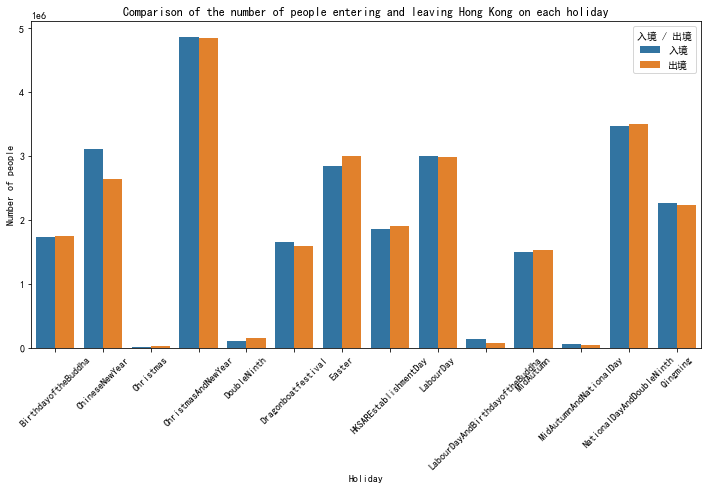

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(x='假期', y='總計', hue='入境 / 出境', data=holiday_stats)
plt.title('Comparison of the number of people entering and leaving Hong Kong on each holiday')
plt.xlabel('Holiday')
plt.ylabel('Number of people')
plt.xticks(rotation=45)
plt.savefig("./charts/bar.png")

## Immigration Arrivals and Departures at Different Control Points on Different Holidays - Heat Map

In [106]:
station_holiday_stats = df.groupby(['管制站', '假期', '入境 / 出境'])['總計'].sum().reset_index()

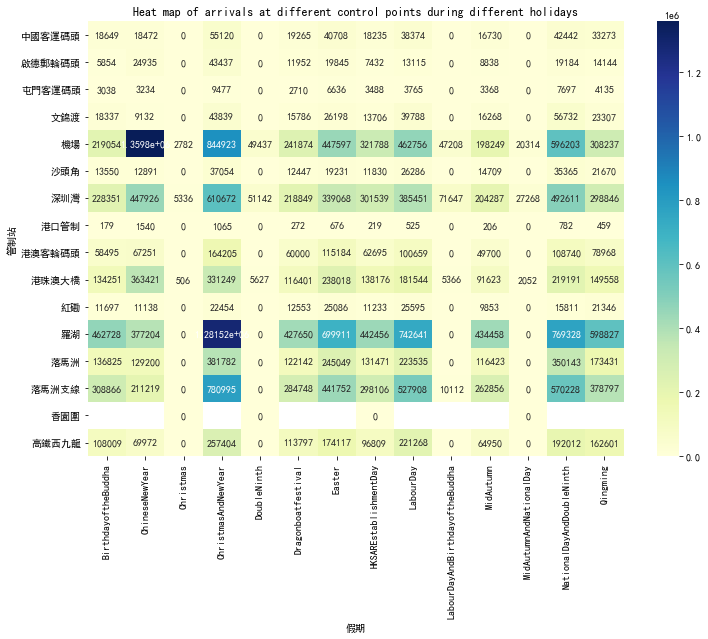

In [124]:
entry_stats = station_holiday_stats[station_holiday_stats['入境 / 出境'] == '入境']
pivot_entry = entry_stats.pivot(index='管制站', columns='假期', values='總計')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_entry, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heat map of arrivals at different control points during different holidays')
plt.savefig("./charts/heatmap1.png")

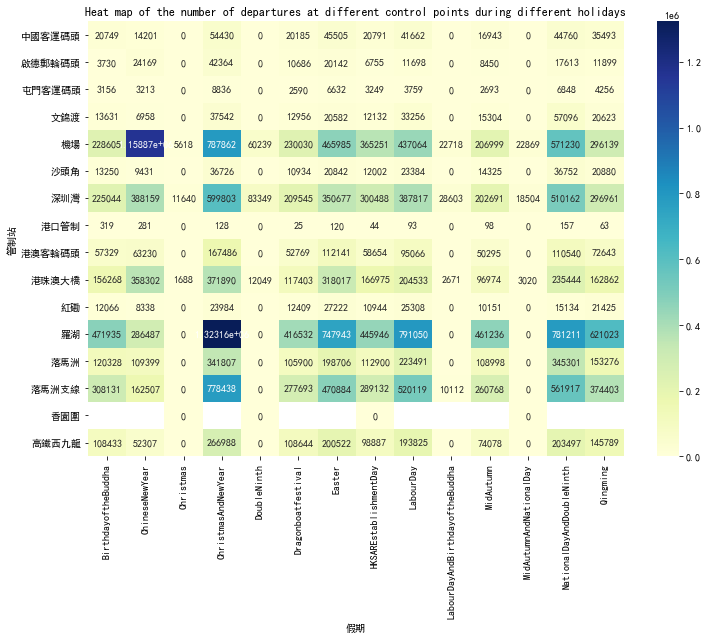

In [125]:
exit_stats = station_holiday_stats[station_holiday_stats['入境 / 出境'] == '出境']
pivot_exit = exit_stats.pivot(index='管制站', columns='假期', values='總計')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_exit, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heat map of the number of departures at different control points during different holidays')
plt.savefig("./charts/heatmap2.png")

## Percentage of Different Types of Visitors during Qingming Holiday - Pie Chart

### Filtering out data for the Qing Ming Festival holiday

In [118]:
qingming_df = df[df['假期'] == 'Qingming']

### Calculate the total number of different types of inbound visitors for the Ching Ming Festival

In [119]:
entry_hk_residents = qingming_df[qingming_df['入境 / 出境'] == '入境']['香港居民'].sum()
entry_mainland_visitors = qingming_df[qingming_df['入境 / 出境'] == '入境']['內地訪客'].sum()
entry_other_visitors = qingming_df[qingming_df['入境 / 出境'] == '入境']['其他訪客'].sum()
entry_total = entry_hk_residents + entry_mainland_visitors + entry_other_visitors

### Calculate the percentage of entry

In [120]:
entry_percentages = [entry_hk_residents / entry_total, entry_mainland_visitors / entry_total, entry_other_visitors / entry_total]
entry_labels = ['香港居民', '內地訪客', '其他訪客']

### Draw the Pie chart

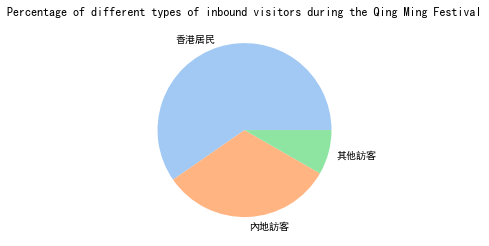

In [126]:
colors = sns.color_palette('pastel')
plt.pie(entry_percentages, labels=entry_labels, colors=colors)
plt.title('Percentage of different types of inbound visitors during the Qing Ming Festival')
plt.savefig("./charts/pie.png")